In [1]:
library(tidyverse)
employees <- read_csv("_build/data/employee_data.csv")
employees$Salary <- parse_number(employees$Salary)
employees$Start_Date <- parse_date(employees$Start_Date, format = "%m/%d/%Y")
degreeLevels <- c("High School", "Associate's", "Bachelor's", "Master's", "Ph.D")
employees$Degree <- parse_factor(employees$Degree, levels = degreeLevels, ordered = TRUE)
modelAge <- lm(Salary ~ Age, data=employees)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --


v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  


-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Parsed with column specification:
cols(
  ID = col_double(),
  Name = col_character(),
  Gender = col_character(),
  Age = col_double(),
  Rating = col_double(),
  Degree = col_character(),
  Start_Date = col_character(),
  Retired = col_logical(),
  Division = col_character(),
  Salary = col_character()
)


# Understanding Our Regression Model

Our least squares estimates $b_0$ and $b_1$ are estimates of the true theoretical values $\beta_0$ and $\beta_1$ respectively. Since the regression line is calculated using sample data, we can construct confidence intervals and perform hypothesis tests on our estimates. The `confint()` function reports 95\% confidence intervals for the regression coefficients.

```{admonition} Syntax
`confint(model)`
```

In [2]:
confint(modelAge)

,2.5 %,97.5 %
(Intercept),58390.197,75877.208
Age,1834.364,2219.292


We can obtain more detailed output using the `summary()` command.

```{admonition} Syntax
`summary(model)`
```

In [3]:
summary(modelAge)


Call:
lm(formula = Salary ~ Age, data = employees)

Residuals:
    Min      1Q  Median      3Q     Max 
-103272  -21766    2428   23138   90680 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 67133.70    4455.17   15.07   <2e-16 ***
Age          2026.83      98.07   20.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32630 on 918 degrees of freedom
  (80 observations deleted due to missingness)
Multiple R-squared:  0.3175,	Adjusted R-squared:  0.3168 
F-statistic: 427.1 on 1 and 918 DF,  p-value: < 2.2e-16


We usually focus on just $b_1$ since we are primarily interested in the relationship between the variables. Our best estimate for $b_1$ is \$2,026.83, but because we are basing this estimate on a data sample, we could be wrong. We can say with 95% confidence that the true value of the slope (denoted $\beta_1$) could be as low as \$1,834.36 to as high as \$2,219.29. The good news is the confidence interval contains only positive values, indicating a positive relationship between `Salary` and `Age`. If zero fell into this interval we would not be able to conclude that there was a positive relationship between `Salary` and `Age`.

By applying the `summary()` command to our regression we can see p-values listed for each coefficient. The hypothesis test being done here is "does the true slope equal 0?", and "does the true intercept equal 0?". In symbols we are testing for the slope:

+ $H_o: \beta_1 = 0$ 
+ $H_a: \beta_1 \ne 0$

A small p-value, less than the significance level (often 0.05), means we reject the null hypothesis and can conclude there is likely a linear relationship between the $x$ and $y$ variables; simply put, a small p-value indicates we need $x$ in the model. 

The p-value for the intercept corresponds to the hypothesis test asking, "does the true intercept equal 0?" We often ignore the p-value of the intercept when the intercept is difficult to interpret.

## The R-Squared ($R^2$)

The `summary()` command gives additional information about the regression fit. In particular, at the bottom of the summary output, we see two items:

+ Multiple R-squared, often denoted $R^2$
+ Adjusted R-squared, often denoted $R_a^{2}$

The $R^2$ is a goodness of fit measure and always falls in the interval 0 to 1. In essence, we do regression to try to understand how changes in the $x$ variable explain what is happening to a $y$ variable. If $y$ didn't vary when $x$ changes, it would be very boring to explain, so in essence we are trying to explain the variation in $y$ using $x$. The $R^2$ tells us the percentage of the variation in $y$ explained by $x$, with higher being better. One issue with $R^2$ is that it can go up simply by adding more $x$ variables to a model, so $R_a^2$ reflects a penalty factor related to the number of $x$ variables in the model. The adjusted R-squared value is always the preferred measure to report.

```{warning}
When a linear regression model has more than one independent variable, report $R_a^2$ instead of $R^2$.
```

However, neither $R^2$ nor $R_a^2$ indicates anything about predictability, so another measure described below is more useful to consider.

## Estimate of Noise and Prediction

When we look at the scatter plot, we see noise in the model; that is, we see a line plus variation (“noise”) around the line. Regression modeling assumes that the noise $\epsilon$ is normally distributed with mean 0 and variance $\sigma^2$. The value $\sigma^2$ is key when using a regression model for prediction, since it tells us how accurate our predictions are. The estimate of $\sigma$ from our sample data is denoted $s_e$ and is called the **residual standard error**. 

This residual standard error is important because we can create approximate prediction intervals using the formula:

$$predicted\; y =\hat{y} =  (b_0+b_1(x))\pm 1.96(s_e)$$

The `summary()` function applied to the regression tells us that the residual standard error is \$32,630. Thus, the predicted income of someone 40 years old is:

$$\$67,133.70 + \$2,026.83(40) = \$148,206.9$$

But we know it's not an exact relationship, so it would be nice to put lower and upper bounds on this prediction. We are roughly 95\% confident that the predicted income for someone 40 years old is in the interval: 

$$\$148,206.9 \pm 1.96(\$32,630) = (\$84,252.1 ; \$212,161.7)$$

A more formal prediction interval can be found in R using the `predict()` function. Note that the formula shown above is an approximation and that this function's results are more precise, so the intervals differ slightly.

In [4]:
newData <- data.frame(Age = 40)
predict(modelAge, newData, interval = "predict")

fit,lwr,upr
148206.8,84124.55,212289.1


A rough rule of thumb when looking at regression models is to look at $s_e$ then double it; your 95% prediction interval will be roughly $\hat{y} \pm 2(s_e)$ (for this estimate 2 is rounded up from 1.96). You can use this as a quick guide to decide if you think it is an acceptable model.

```{warning}
$R^2$ does not inform about a linear regression model's predictive ability, so one must also report $s_e$.
```

## Basic Diagnostic Plots

When doing regression analysis, we assume a linear relationship between the $X$ and $Y$ variable. We also assume the noise in the model follows a normal distribution. Both of these assumptions may be checked with separate **diagnostic plots**.

The residuals $e_i$, also called the **errors**, are the observed ($y_i$) minus the predicted ($\hat{y_i}$) values for each row in our data set. The most basic plot is a residual versus fitted (predicted) value plot. This plot is easily created in R as shown below, and if the modeling assumptions are correct should show a random scatter of points. Note that we pass our regression model into the same `plot()` function we have seen before, but set the `which` argument to `1` in order to get a residual vs. fitted plot.

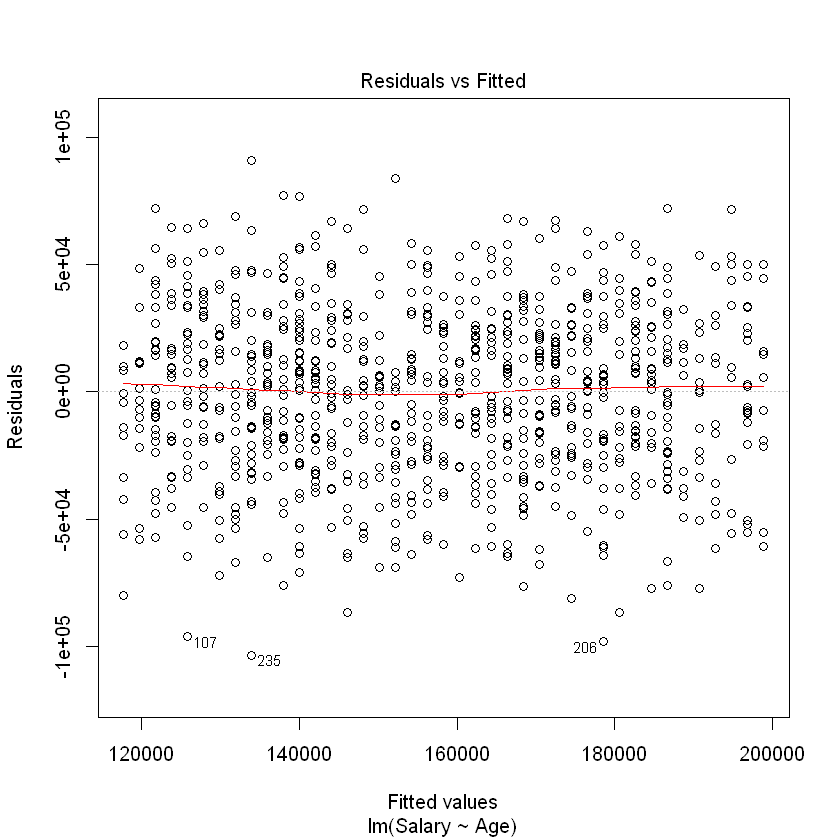

In [5]:
plot(modelAge, which=1)

The red line shown in the plot is a local linear smooth used to capture the trend of the points. We see no relationship between the residuals and the fitted values, which must be true if the regression assumptions hold.

To contrast with the ideal plot, consider some simulated data of a non-linear relationship between $X$ and $Y$, which we don't know so we fit a line. As the plots below indicate, there is an unusual relationship between the residuals and fitted values that would indicate we should investigate this model more fully.

```{figure} ../images/unusual_resid_fitted.png
---
height: 400px
align: center
name: unusual_resid
---
Unusual Residuals v. Fitted Plot
```

The normality assumption of the noise in the model may be checked by either looking at a histogram or a **qq-plot** of the error terms. We can extract an atomic vector of the residuals from our model using the `residuals()` function:

```{admonition} Syntax
`residuals(model)`
```

By passing these residuals into `hist()`, we can observe the histogram of the residuals to check whether they are normally-distributed:

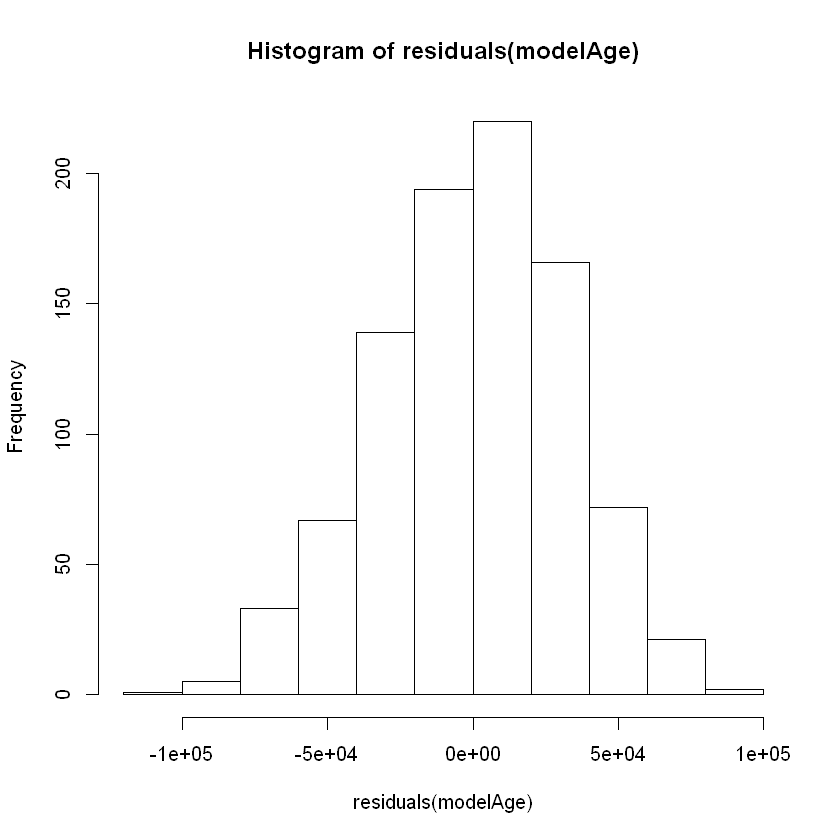

In [6]:
hist(residuals(modelAge))

Based on this plot, the residuals of our model appear to be relatively normal. Another important diagnostic plot to look at is the **qq-plot**, which also helps us visually inspect whether our residuals are normally distributed. A qq-plot plots the residuals from our model against a straight line. If the plotted residuals fall mostly on the straight line, we conclude that they are most likely normally-distributed. If they deviate from the straight line, we conclude they might not be normally-distributed.

To create the qq-plot, we can pass our model into the `plot()` function and set the `which` parameter equal to `2`:

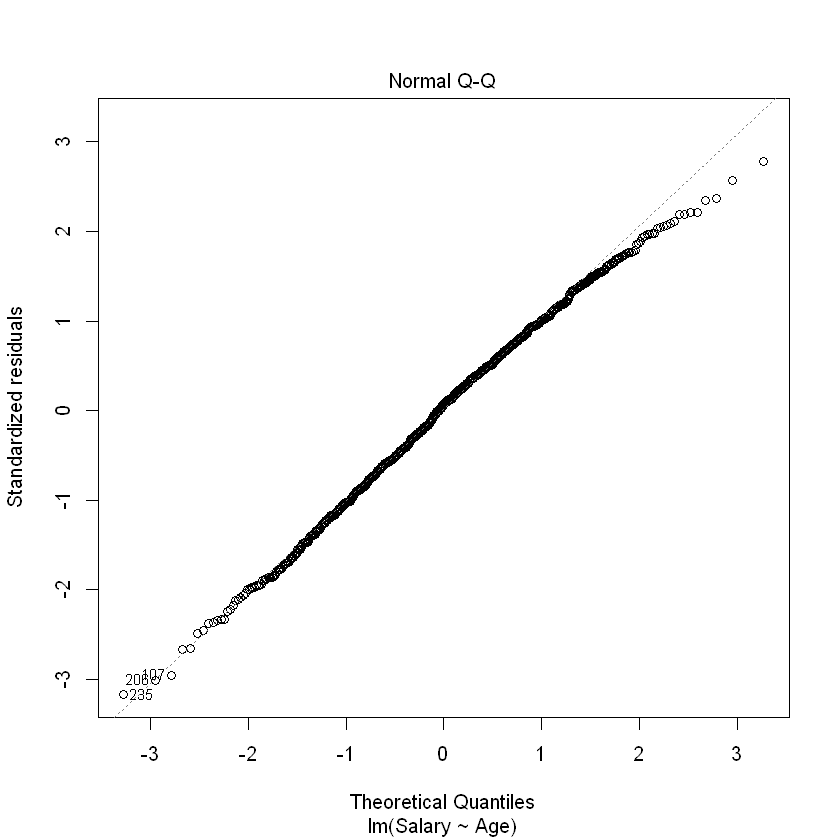

In [7]:
plot(modelAge, which = 2)

Consistent with the histogram of the residuals, the qq-plot shows that the residuals are approximately normal (*i.e.*, they mostly fall on the straight line).

```{warning}
Always verify that the model residuals are normally distributed.
```